# **Importing libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import median
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import k_means
from pylab import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# **Importing data**

In [0]:
train = pd.read_csv("https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv")
test = pd.read_csv("https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")
status = pd.read_csv("https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")

# **Joining features with target for basic EDA**

In [0]:
train_new = pd.concat([train,status["status_group"]],axis = 1)

# **Data Preprocessing**

##**Dealing with null values**

In [6]:
train_new.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

###**There are too many null values in Scheme_name to impute so we will remove it**

In [0]:
train_ex = train_new.drop(columns = 'scheme_name')
test = test.drop(columns = 'scheme_name')

###**We will creating a new column with no of null values in each rows for our convenience**

In [0]:
train_ex["Null_count"] = train_ex.apply(lambda x: x.isnull().sum(), axis=1)
test["Null_count"] = test.apply(lambda x: x.isnull().sum(), axis=1)

###**Looking at descirption of null values we can see maximum 5 null values are there in any row.**

In [9]:
train_ex["Null_count"].describe()

count    59400.000000
mean         0.301818
std          0.732179
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: Null_count, dtype: float64

In [10]:
test["Null_count"].describe()

count    14850.000000
mean         0.294411
std          0.721360
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: Null_count, dtype: float64

**So**

In [11]:
print("No of data with null values 5 or less than 5:",train_ex[train_ex["Null_count"]<=5].shape[0],",if we keep this it will remove",round(((train_ex[train_ex["Null_count"]<=5].shape[0])-(train_ex[train_ex["Null_count"]<=5].shape[0]))/(train_ex[train_ex["Null_count"]<=5].shape[0])*100,2),"% data")
print("\nNo of data with null values 4 or less than 4:",train_ex[train_ex["Null_count"]<=4].shape[0],",if we keep this it will remove",round(((train_ex[train_ex["Null_count"]<=5].shape[0])-(train_ex[train_ex["Null_count"]<=4].shape[0]))/(train_ex[train_ex["Null_count"]<=5].shape[0])*100,2),"% data")
print("\nNo of data with null values 3 or less than 3:",train_ex[train_ex["Null_count"]<=3].shape[0],",if we keep this it will remove",round(((train_ex[train_ex["Null_count"]<=5].shape[0])-(train_ex[train_ex["Null_count"]<=3].shape[0]))/(train_ex[train_ex["Null_count"]<=5].shape[0])*100,2),"% data")
print("\nNo of data with null values 2 or less than 2:",train_ex[train_ex["Null_count"]<=2].shape[0],",if we keep this it will remove",round(((train_ex[train_ex["Null_count"]<=5].shape[0])-(train_ex[train_ex["Null_count"]<=2].shape[0]))/(train_ex[train_ex["Null_count"]<=5].shape[0])*100,2),"% data")
print("\nNo of data with null values 1 or none:",train_ex[train_ex["Null_count"]<=1].shape[0],",if we keep this it will remove",round(((train_ex[train_ex["Null_count"]<=5].shape[0])-(train_ex[train_ex["Null_count"]<=1].shape[0]))/(train_ex[train_ex["Null_count"]<=5].shape[0])*100,2),"% data")
print("\nNo of data with no null values:",train_ex[train_ex["Null_count"]==0].shape[0],",if we keep this it will remove",round(((train_ex[train_ex["Null_count"]<=5].shape[0])-(train_ex[train_ex["Null_count"]==0].shape[0]))/(train_ex[train_ex["Null_count"]<=5].shape[0])*100,2),"% data")

No of data with null values 5 or less than 5: 59400 ,if we keep this it will remove 0.0 % data

No of data with null values 4 or less than 4: 59394 ,if we keep this it will remove 0.01 % data

No of data with null values 3 or less than 3: 59229 ,if we keep this it will remove 0.29 % data

No of data with null values 2 or less than 2: 56913 ,if we keep this it will remove 4.19 % data

No of data with null values 1 or none: 55248 ,if we keep this it will remove 6.99 % data

No of data with no null values: 48288 ,if we keep this it will remove 18.71 % data


**Thus we go for the data with null values 1 or none**



In [0]:
df = train_ex[train_ex["Null_count"]<=1]

In [13]:
df.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                     34
gps_height                  0
installer                  38
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                363
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           2630
recorded_by                 0
scheme_management        3399
permit                    496
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_g

In [14]:
test.isnull().sum()

id                         0
amount_tsh                 0
date_recorded              0
funder                   869
gps_height                 0
installer                877
longitude                  0
latitude                   0
wpt_name                   0
num_private                0
basin                      0
subvillage                99
region                     0
region_code                0
district_code              0
lga                        0
ward                       0
population                 0
public_meeting           821
recorded_by                0
scheme_management        969
permit                   737
construction_year          0
extraction_type            0
extraction_type_group      0
extraction_type_class      0
management                 0
management_group           0
payment                    0
payment_type               0
water_quality              0
quality_group              0
quantity                   0
quantity_group             0
source        

In [0]:
df = df.drop(columns = 'Null_count')

**We will now Impute the columns with null values with mode**

In [0]:
for i in ['funder','installer','subvillage','public_meeting','scheme_management','permit']:
  df_new = df.fillna(df[i].value_counts().index[0])
  test = test.fillna(test[i].value_counts().index[0])

In [17]:
df_new.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [18]:
test.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

## **Now we will look at the columns with variables**

###**We will create a new column named age for our convenience**

In [0]:
df_new["age"] = 2018
test["age"] = 2018

In [0]:
df_new["age"] = df_new["age"] - df_new["construction_year"]
test["age"] = test["age"] - test["construction_year"]

In [21]:
df_new[df_new["age"] == 2018].shape

(18279, 41)

In [22]:
test[test['age'] == 2018].shape

(5260, 41)

**We can see that there are many ages that has a value of 2018, which is obviously missing value, so we will have to impute it.**

In [0]:
df_age = df_new[df_new['age']!= 2018]
test_age = test[test['age']!= 2018]

###**We will impute the ages by different scheme management**

In [0]:
for name in df_age['scheme_management'].unique():
  for i in range(len(df_new)):
    if df_new.iloc[i,20] == name and df_new.iloc[i,40] == 2018:
      df_new.iloc[i,40] = mean(df_age[df_age['scheme_management']==name]['age'])
      

In [0]:
for name in test_age['scheme_management'].unique():
  for i in range(len(test)):
    if test.iloc[i,20] == name and test.iloc[i,40] == 2018:
      test.iloc[i,40] = mean(test_age[test_age['scheme_management']==name]['age'])

In [26]:
df_new['age'].describe()

count    55248.000000
mean        20.976952
std         10.264883
min          5.000000
25%         13.000000
50%         21.000000
75%         23.000000
max         58.000000
Name: age, dtype: float64

In [27]:
test['age'].describe()

count    14850.000000
mean        20.924695
std          9.967954
min          5.000000
25%         13.720149
50%         21.232332
75%         22.132882
max         58.000000
Name: age, dtype: float64

###**We will now work with longitude and latitude, we will create clusters based on them.**

In [0]:
long_lat = df_new.iloc[:,[6,7]]
long_lat_test = test.iloc[:,[6,7]]

In [0]:
std_scale = StandardScaler()

In [0]:
long_lat_sca = std_scale.fit_transform(long_lat)
long_lat_test_sca = std_scale.fit_transform(long_lat_test)

In [0]:
ss = []
for k in range (1,10):
    km=KMeans(n_clusters=k)
    km.fit(X=long_lat_sca)
    ss.append(km.inertia_)

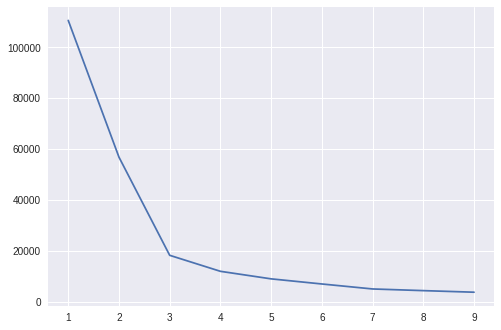

In [32]:
plt.plot(list(range(1,10)),ss)

In [33]:
clus_3 = k_means(X= long_lat_sca, n_clusters =3)[1]
print(silhouette_score(X = long_lat_sca, labels = clus_3))

0.5796213232786898


In [34]:
km_3 = KMeans(n_clusters=3)
km_test = KMeans(n_clusters = 3)
km_3.fit(long_lat_sca)
km_test.fit(long_lat_test_sca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
df_new["cluster"] = km_3.labels_
test['cluster'] = km_test.labels_

In [36]:
d = {0:'cluster_0',1 : 'cluster_1',2: 'cluster_2'}
d

{0: 'cluster_0', 1: 'cluster_1', 2: 'cluster_2'}

In [0]:
df_new['cluster'] = df_new['cluster'].map(d)
test['cluster'] = test['cluster'].map(d)

**We will not need latitude and longitude anymore**

In [0]:
df_new  = df_new.drop(columns = ['longitude','latitude'])
test = test.drop(columns = ['longitude','latitude'])

###**Now lets look at amont_tsh**

**amount_tsh refers to Total static head (amount water available to waterpoint)**

In [39]:
df_new['amount_tsh'].describe()

count     55248.000000
mean        330.160944
std        2718.876718
min           0.000000
25%           0.000000
50%           0.000000
75%          30.000000
max      250000.000000
Name: amount_tsh, dtype: float64

In [40]:
print(round((df_new[df_new['amount_tsh']==0].shape[0]/df_new.shape[0])*100,2),"% of the data has amount_tsh zero")

68.53 % of the data has amount_tsh zero


In [0]:
Q3_amount_tsh = mean(df_new['amount_tsh'])+3*std(df_new['amount_tsh'])

In [42]:
print(round((df_new[df_new['amount_tsh']>=Q3_amount_tsh].shape[0]/df_new.shape[0])*100,2),"% data is outlying in amount_tsh")

0.42 % data is outlying in amount_tsh


**We will impute this outlying data with mean value**

In [0]:
for i in range(len(df_new)):
  if df_new.iloc[i,1]>=Q3_amount_tsh:
    df_new.iloc[i,1] = mean(df_new['amount_tsh'])

In [44]:
df_new['amount_tsh'].describe()

count    55248.000000
mean       226.721166
std        775.810158
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max       8000.000000
Name: amount_tsh, dtype: float64

###**Now we will deal with population**

In [45]:
df_new['population'].describe()

count    55248.000000
mean       185.753964
std        477.444373
min          0.000000
25%          0.000000
50%         40.000000
75%        230.000000
max      30500.000000
Name: population, dtype: float64

**We can see that there are places with population zero, which is not normal**

In [46]:
print(round((df_new[df_new['population']==0].shape[0]/df_new.shape[0])*100,2),"% data has population zero")

34.65 % data has population zero


In [0]:
df_pop = df_new[df_new['population']==0]

In [48]:
for i in df_new.select_dtypes(include=['object']).columns:
  for j in df_pop.select_dtypes(include=['object']).columns:
    if df_new[i].unique().shape[0] == df_pop[j].unique().shape[0] and i == j:
      print(i," column has same no of unique values in both df_new and df_pop")

recorded_by  column has same no of unique values in both df_new and df_pop
extraction_type  column has same no of unique values in both df_new and df_pop
extraction_type_group  column has same no of unique values in both df_new and df_pop
extraction_type_class  column has same no of unique values in both df_new and df_pop
management_group  column has same no of unique values in both df_new and df_pop
payment  column has same no of unique values in both df_new and df_pop
payment_type  column has same no of unique values in both df_new and df_pop
water_quality  column has same no of unique values in both df_new and df_pop
quality_group  column has same no of unique values in both df_new and df_pop
quantity  column has same no of unique values in both df_new and df_pop
quantity_group  column has same no of unique values in both df_new and df_pop
source  column has same no of unique values in both df_new and df_pop
source_type  column has same no of unique values in both df_new and df_pop


**We can see that none of the columns that can out forrm the result is relevent with population**

**So we can do nothing apperently with this population**

#**EDA**

##**Changing class type**

In [0]:
df_new['permit'] = df_new['permit'].astype('object')
df_new['public_meeting'] = df_new['public_meeting'].astype('object')

###**Categorical plot**

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


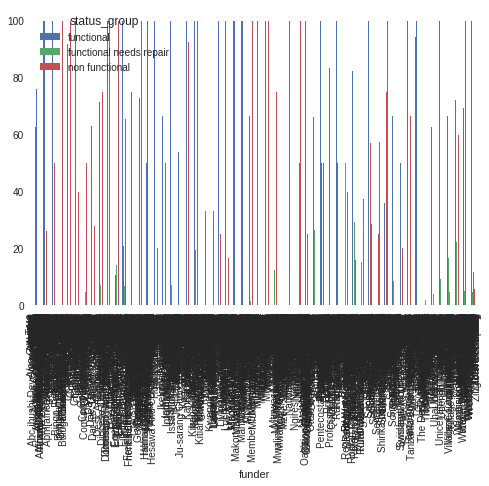

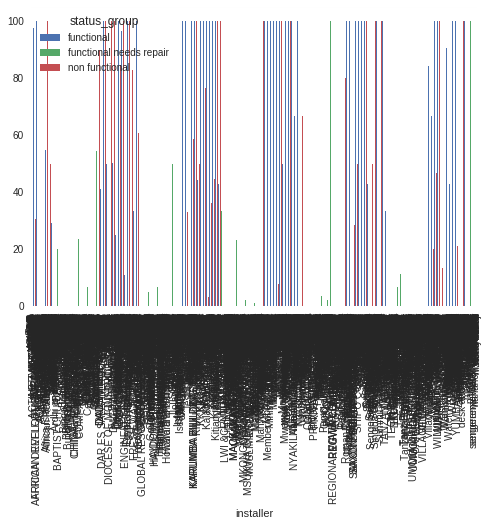

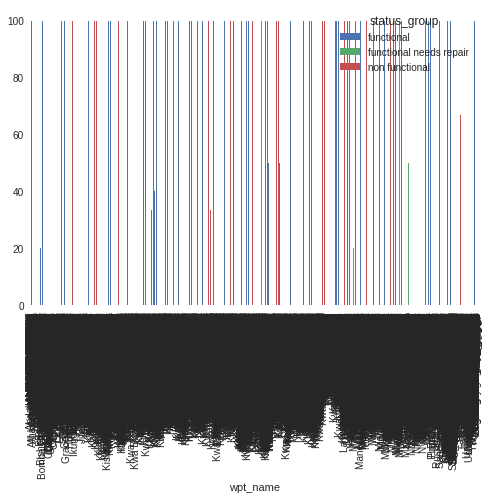

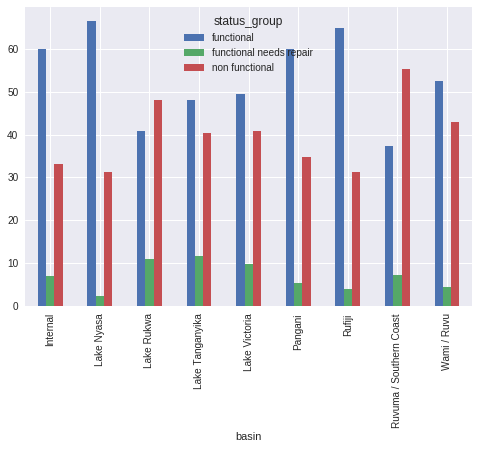

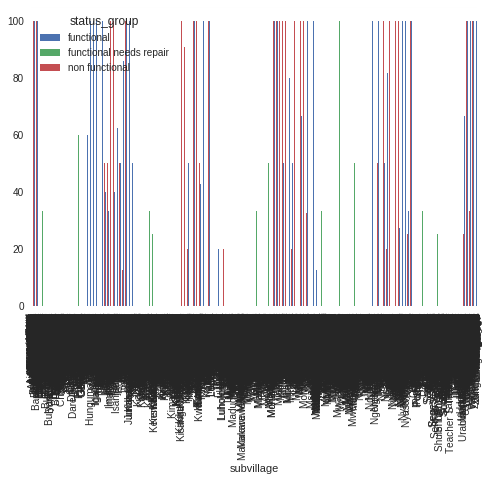

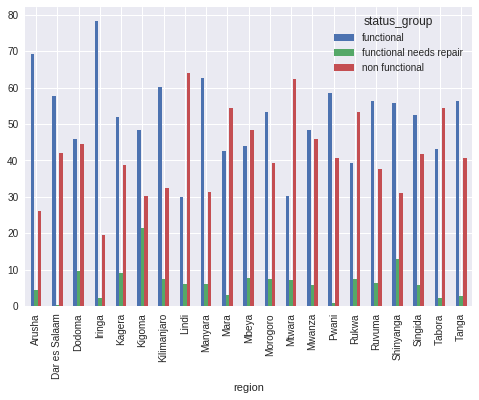

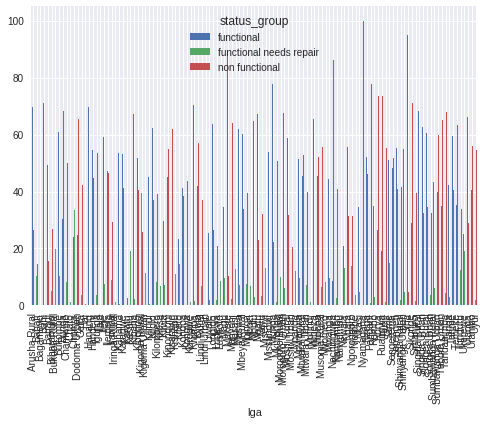

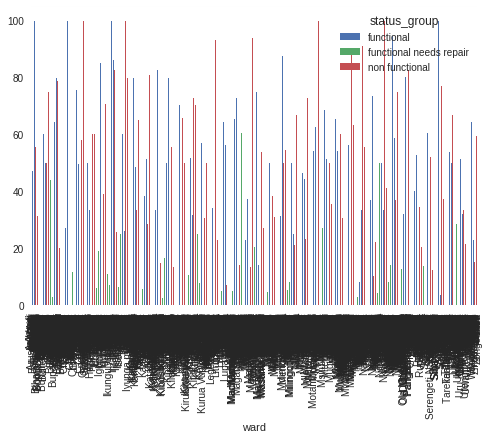

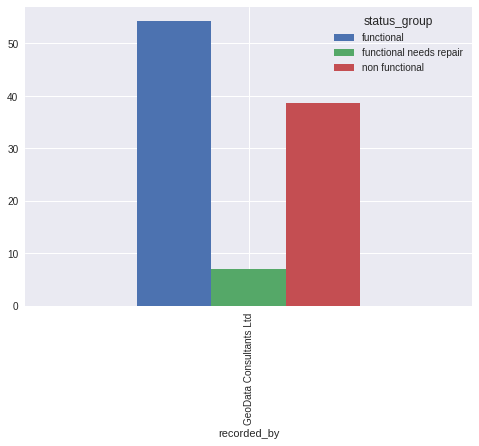

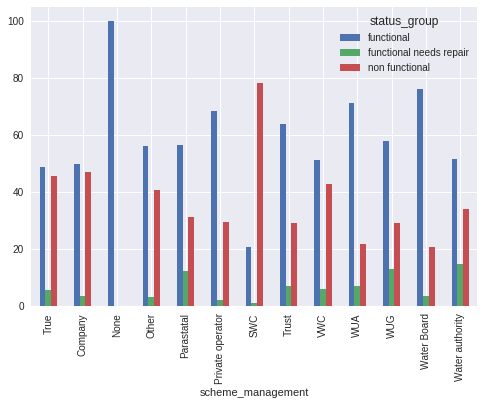

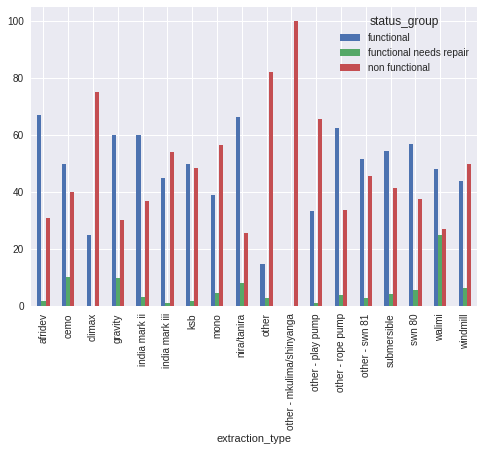

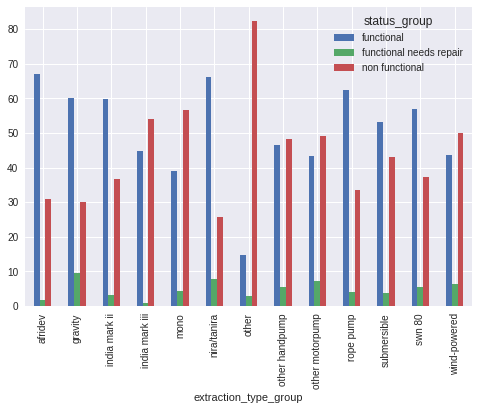

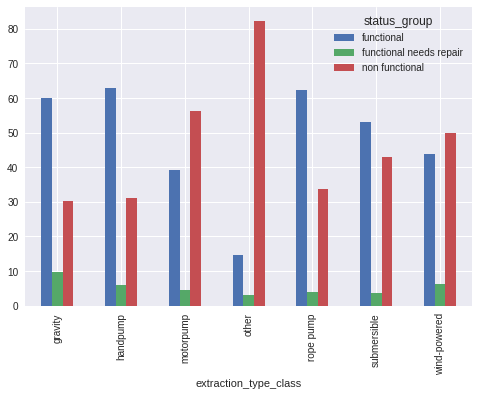

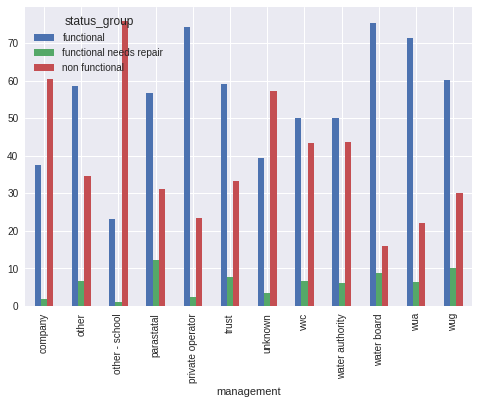

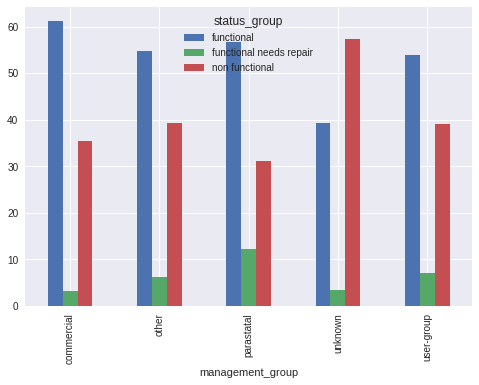

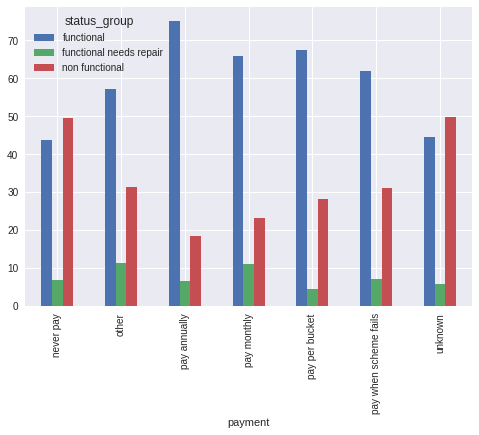

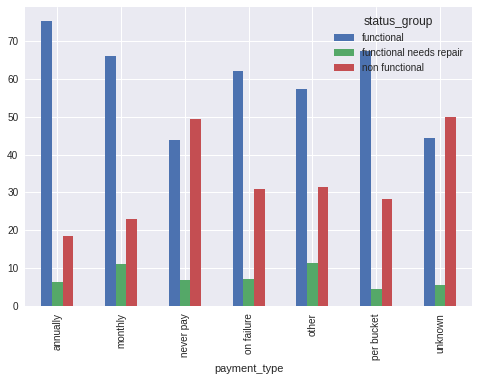

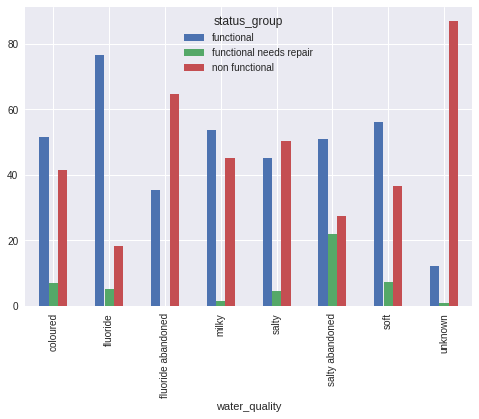

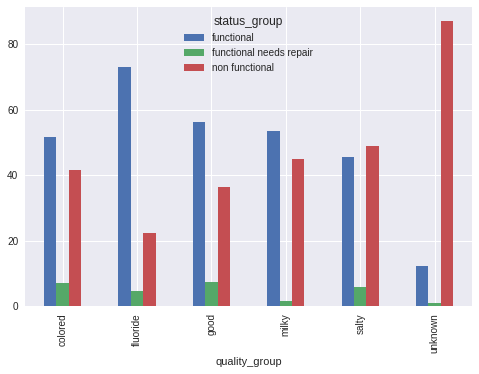

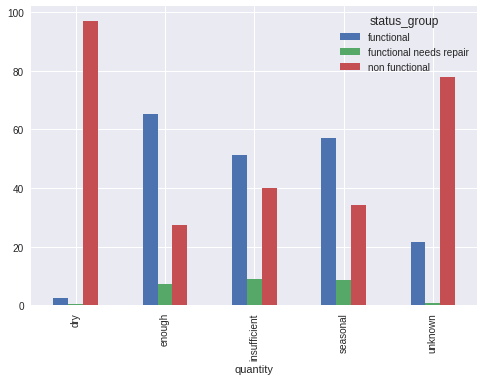

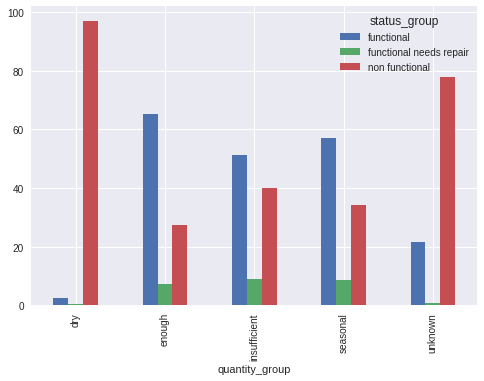

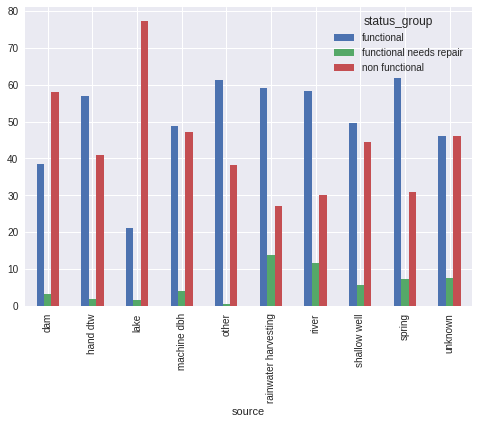

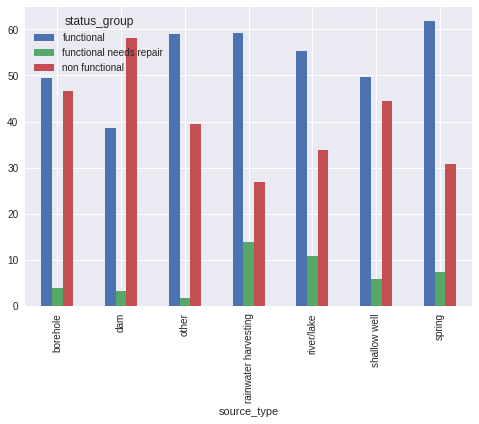

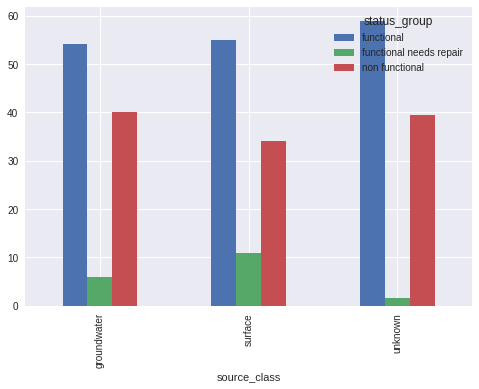

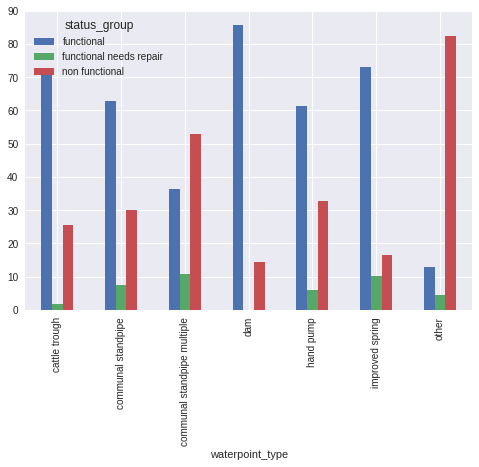

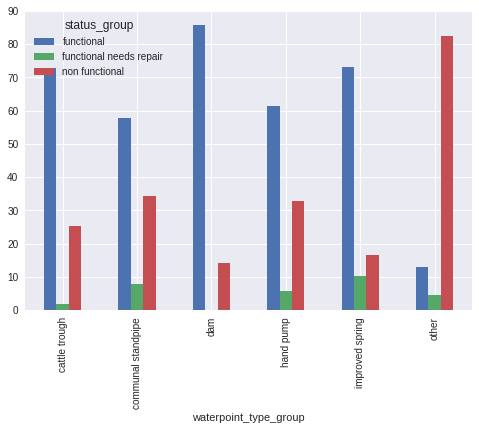

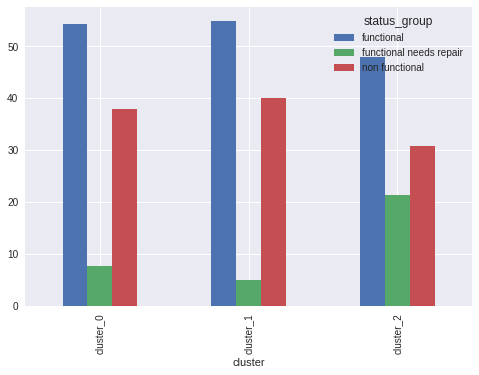

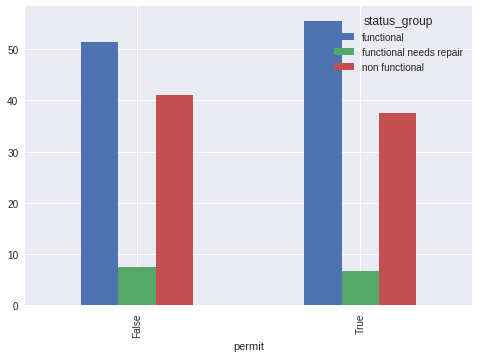

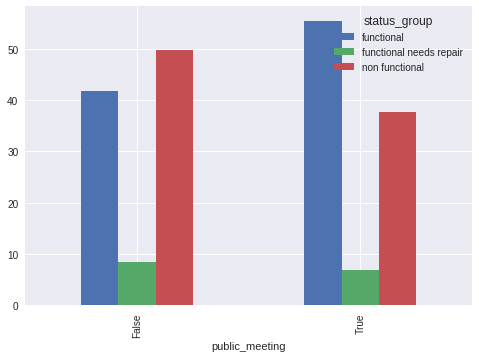

In [0]:
features = ['funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'recorded_by',
       'scheme_management', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'cluster','permit','public_meeting']

for i in features:
    a = pd.crosstab(df_new[i], df_new["status_group"], normalize='index').round(4)*100
    a.plot.bar()
    
show()

In [0]:
sns.barplot(y = df_new['population'], x = df_new["status_group"])

###**Continuous Variable plot**

In [0]:
con_var = ['amount_tsh','gps_height','population','age']

for i in con_var:
    sns.barplot(y = df_new[i], x = df_new["status_group"])
    show()

NameError: ignored

#**Feature Selection**

##**The predictors we will use are**

** 'amount_tsh', 'funder', 'gps_height', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group','age',
       'cluster'**

In [0]:
df_final = df_new.loc[:,['amount_tsh','gps_height', 'basin', 'region',
       'lga', 'ward', 'population',
       'public_meeting', 'extraction_type', 
       'management', 'payment',
       'water_quality', 'quantity', 'source',
       'waterpoint_type','age'
       ]]
test_final = test.loc[:,['amount_tsh','gps_height', 'basin', 'region',
       'lga', 'ward', 'population',
       'public_meeting', 'extraction_type', 
       'management', 'payment',
       'water_quality', 'quantity', 'source',
       'waterpoint_type','age'
       ]]


#**Data Transform**

In [0]:
std = StandardScaler()
le = LabelEncoder()

In [0]:
for i in df_final.select_dtypes('object').columns:
  df_final[i] = le.fit_transform(df_final[i].astype(str))
  test_final[i] = le.fit_transform(test_final[i].astype(str))

In [53]:
df_final_std = std.fit_transform(df_final)
test_final_std = std.fit_transform(test_final)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#**Modeling**

In [0]:
X = df_final_std
y = df_new['status_group'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [0]:
LR = LogisticRegression(penalty='l2', C= 0.1,solver = 'newton-cg', multi_class='multinomial',max_iter=1000)
RFC= RandomForestClassifier(n_estimators=1000,criterion = 'entropy')
GBC =GradientBoostingClassifier(n_estimators=1000)
svm_rbf = SVC()
models = [LR,RFC,GBC,svm_rbf]

In [59]:
for model in models:
  y_pred = model.fit(X_train,y_train).predict(X_test)
  print("\nEvaluation for:",model)
  print("\nAccuracy Score:", accuracy_score(y_test,y_pred))
  #print("ROC_AUC Score:", roc_auc_score(y_test,y_pred))
  #print("F1 Score:",f1_score(y_test,y_pred))


Evaluation for: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy Score: 0.6345098039215686

Evaluation for: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy Score: 0.7986123680241327

Evaluation for: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_no

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Evaluation for: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Accuracy Score: 0.7505279034690799


#**Test data prediction**

In [0]:
final_result_RFC = RFC.predict(test_final_std)
final_result_GBC = GBC.predict(test_final_std)
final_result_svm_rbf = svm_rbf.predict(test_final_std)

In [0]:
test['status_group_RFC']=final_result_RFC
test['status_group_GBC']=final_result_GBC
test['status_group_svm_rbf']=final_result_svm_rbf

In [0]:
result_RFC = test.loc[:,["id","status_group_RFC"]]
result_GBC = test.loc[:,["id","status_group_GBC"]]
result_svm_rbf = test.loc[:,["id","status_group_svm_rbf"]]

In [0]:
from google.colab import files

In [0]:
result_RFC.to_csv('submission_rfc.csv')
result_GBC.to_csv('submission_gbc.csv')
result_svm_rbf.to_csv('submission_svm_rbf.csv')

In [0]:
files.download('submission_rfc.csv')

In [0]:
files.download('submission_gbc.csv')

In [0]:
files.download('submission_svm_rbf.csv')